# Final project: Choice 2

## Integrating functions with infinite derivatives using Romberg integration

See the full project description on Canvas.

In this project you will implement Romberg integration in order to evaluate definite integrals.

Some skeleton code has been included below. The coding should be completed using Algorithm 4.2 from Burden and Faires. This book is available in the library. The details for the book are

* R L Burden, J D Faires and A M Burden. Numerical Analysis. Cengage Learning, 2016. 

  Library Shelf Mark: QA297 BURD

The book is also available as an ebook from the library. A direct link to it is given [here](http://www.vlebooks.com/vleweb/product/openreader?id=QnsBelfast&isbn=9781473737457).

# Python


### Main code for defining the function and the Romberg method

In [23]:
import numpy as np
import math
import matplotlib.pyplot as plt

####################
# define functions #
####################

# Define a function, y(x), that we wish to integrate
# INPUT 	- x: the point at which the function is evaluated
# OUTPUT	- y: the value of the function

# # First case: x^(1/4)
# def tfunc(x):
#     y = x**0.25
#     return y

# Second case: 4x^4
def tfunc(x):
    y = 4 * x**4
    return y

	

##############
#  Main code #
##############

def romberg( func, a, b, n ):
    # Initialize R array (n x n)
    R = np.zeros((n, n))
    
    # Step 1: Compute h and initial R[0,0]
    h = b - a
    R[0,0] = (h/2) * (func(a) + func(b))
    
    # Step 2: Output first approximation
    print(f"\nStep 2 Output:")
    print(f"R[1,1] = {R[0,0]:.8f}")
    
    # Steps 3-6: Compute the Romberg integration
    for i in range(1, n):
        # Step 3 and 4: Halve h and compute composite trapezoidal rule
        h = h / 2
        sum_f = 0
        num_terms = 2**(i-1)
        for k in range(1, num_terms + 1):
            x = a + (2*k -1)*h
            sum_f += func(x)
        R[i,0] = 0.5 * R[i-1,0] + h * sum_f
        
        # Step 5: Use Richardson extrapolation to compute R[i,j]
        for j in range(1, i+1):
            R[i,j] = R[i,j-1] + (R[i,j-1] - R[i-1,j-1]) / (4**j - 1)
        
        # Step 6: Output the current row
        print(f"\nStep 6 Output (Row {i+1}):")
        for j in range(i+1):
            print(f"R[{i+1},{j+1}] = {R[i,j]:.8f}")
        
    return R


# Define the interval [a, b] and the number of extrapolations n
a = 0
b = 1
n = 10  # Number of times (steps) Richardson extrapolation is applied
exact = 4/5 # Exact value of integral of x^(1/4) and the integral of 4x^4  from 0 to 1

# R1 stores values for case x^(1/4)
R1 = romberg( tfunc, a, b, n )
errors1 = [abs(R1[i,i] - exact) for i in range(n)]

# R2 stores values for case 4x^4
R2 = romberg(tfunc, a, b, n)
errors2 = [abs(R2[i,i] - exact) for i in range(n)]




Step 2 Output:
R[1,1] = 2.00000000

Step 6 Output (Row 2):
R[2,1] = 1.12500000
R[2,2] = 0.83333333

Step 6 Output (Row 3):
R[3,1] = 0.88281250
R[3,2] = 0.80208333
R[3,3] = 0.80000000

Step 6 Output (Row 4):
R[4,1] = 0.82080078
R[4,2] = 0.80013021
R[4,3] = 0.80000000
R[4,4] = 0.80000000

Step 6 Output (Row 5):
R[5,1] = 0.80520630
R[5,2] = 0.80000814
R[5,3] = 0.80000000
R[5,4] = 0.80000000
R[5,5] = 0.80000000

Step 6 Output (Row 6):
R[6,1] = 0.80130196
R[6,2] = 0.80000051
R[6,3] = 0.80000000
R[6,4] = 0.80000000
R[6,5] = 0.80000000
R[6,6] = 0.80000000

Step 6 Output (Row 7):
R[7,1] = 0.80032551
R[7,2] = 0.80000003
R[7,3] = 0.80000000
R[7,4] = 0.80000000
R[7,5] = 0.80000000
R[7,6] = 0.80000000
R[7,7] = 0.80000000

Step 6 Output (Row 8):
R[8,1] = 0.80008138
R[8,2] = 0.80000000
R[8,3] = 0.80000000
R[8,4] = 0.80000000
R[8,5] = 0.80000000
R[8,6] = 0.80000000
R[8,7] = 0.80000000
R[8,8] = 0.80000000

Step 6 Output (Row 9):
R[9,1] = 0.80002035
R[9,2] = 0.80000000
R[9,3] = 0.80000000
R[9,4] = 0.8

### Error plotting

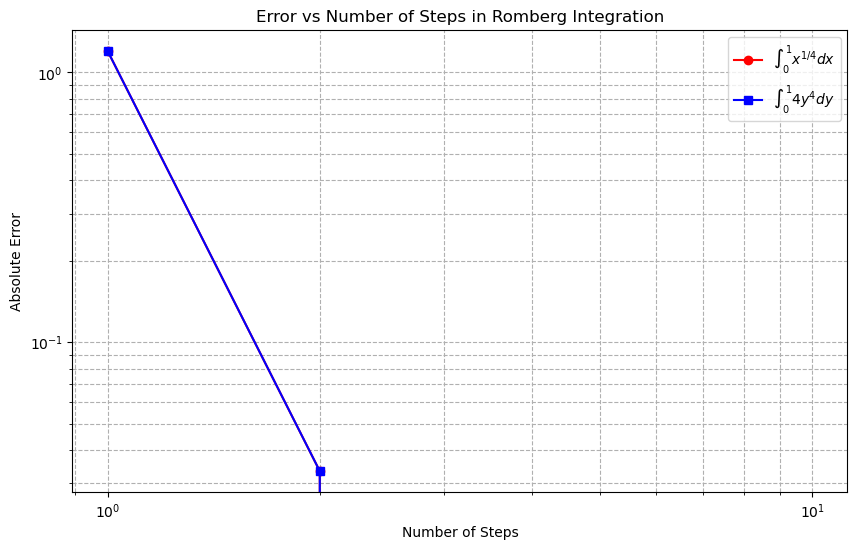

In [24]:

# Create the error plot
plt.figure(figsize=(10, 6))
steps = np.arange(1, n+1)

plt.loglog(steps, errors1, 'ro-', label=r'$\int_0^1 x^{1/4} dx$')
plt.loglog(steps, errors2, 'bs-', label=r'$\int_0^1 4y^4 dy$')

plt.xlabel('Number of Steps')
plt.ylabel('Absolute Error')
plt.title('Error vs Number of Steps in Romberg Integration')
plt.grid(True, which='both', ls='--')
plt.legend()
plt.show()